# Assignment: Numpy and Matplotlib

The goal of this assignment is to gain comfort creating, visualizating, and computing with numpy array. By the end of the assignment, you should feel comfortable:

```{admonition} Learning Goals
:class: tip

- Creating new arrays using `linspace` and `arange`
- Computing basic formulas with numpy arrays
- Loading data from `.npy` files
- Performing reductions (e.g. `mean`, `std` on numpy arrays)
- Making 1D line plots
- Making scatterplots
- Annotating plots with titles and axes
```

## 1 Creating and Manipulating Arrays

First import numpy and matplotlib

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [2]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

### 1.2. Visualize each 2D array using `pcolormesh`

Use the correct coordiantes for the x and y axes.

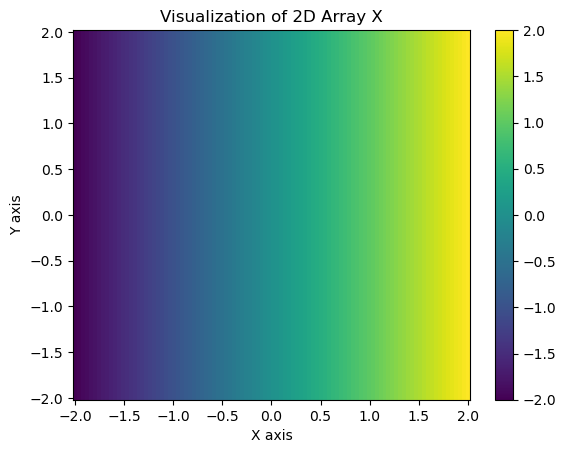

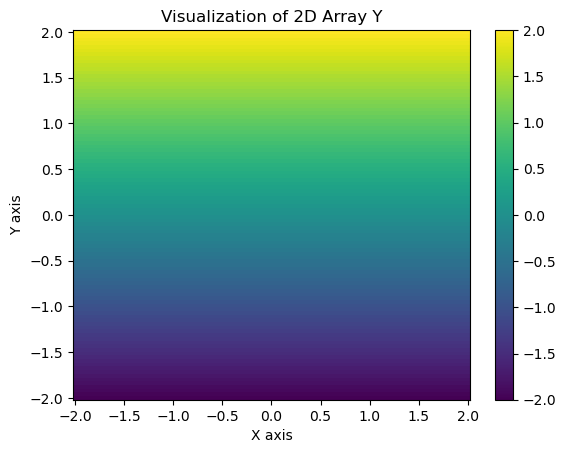

In [3]:
plt.pcolormesh(X, Y, X, shading='auto')
plt.colorbar() 
plt.title("Visualization of 2D Array X")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()


plt.pcolormesh(X, Y, Y, shading='auto')
plt.colorbar()  
plt.title("Visualization of 2D Array Y")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()


### 1.3 From your cartesian coordinates, create polar coordinates $r$ and $\varphi$

Refer to the [wikipedia page](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates) for the conversion formula. You will need to use numpy's `arctan2` function. Read its documentation.


In [4]:
r = np.sqrt(X**2 + Y**2)
phi = np.arctan2(Y, X)

### 1.4. Visualize $r$ and $\varphi$ on the 2D  $x$ / $y$ plane using `pcolormesh`

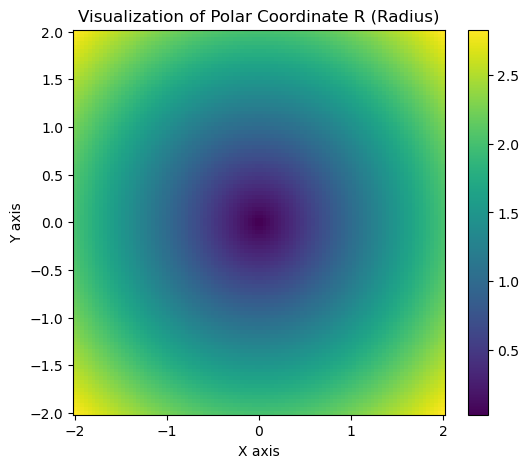

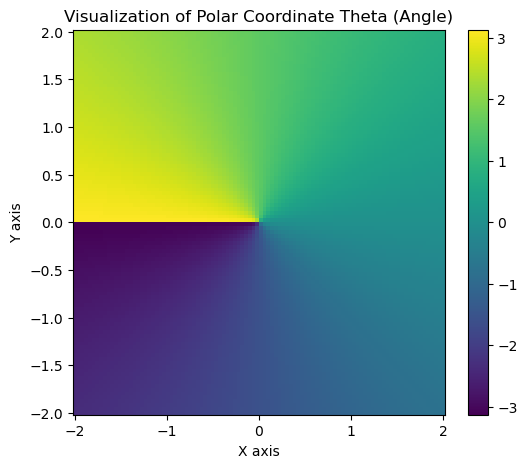

In [5]:
# Visualize R (radius)
plt.figure(figsize=(6,5))
plt.pcolormesh(X, Y, r, shading='auto')
plt.colorbar()
plt.title("Visualization of Polar Coordinate R (Radius)")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

# Visualize Theta (angle)
plt.figure(figsize=(6,5))
plt.pcolormesh(X, Y, phi, shading='auto')
plt.colorbar()
plt.title("Visualization of Polar Coordinate Theta (Angle)")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

### 1.5 Caclulate the quanity $f = \cos^2(4r) + \sin^2(4\varphi)$

And plot it on the x$ / $y$ plane

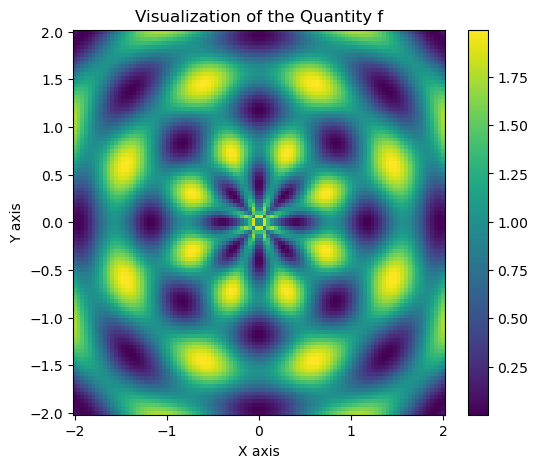

In [6]:
# Calculate the quantity f
f = np.cos(4 * r)**2 + np.sin(4 * phi)**2
# Plot the quantity f on the x/y plane
plt.figure(figsize=(6, 5))
plt.pcolormesh(X, Y, f, shading='auto')
plt.colorbar()
plt.title("Visualization of the Quantity f")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

### 1.6 Plot the mean of f with respect to the x axis

as a function of y

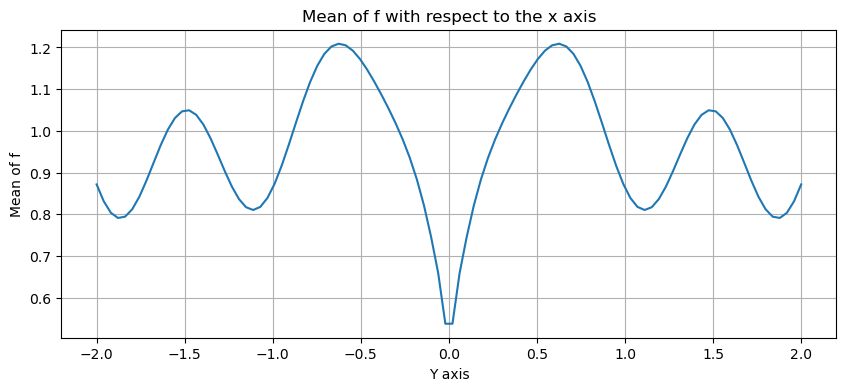

In [7]:
# Calculate the mean of f with respect to the x axis
mean_f_x = np.mean(f, axis=1)

# Plot the mean as a function of y
plt.figure(figsize=(10, 4))
plt.plot(y, mean_f_x)
plt.title("Mean of f with respect to the x axis")
plt.xlabel("Y axis")
plt.ylabel("Mean of f")
plt.grid(True)
plt.show()

### 1.7 Plot the mean of f with respect to the y axis

as a function of x

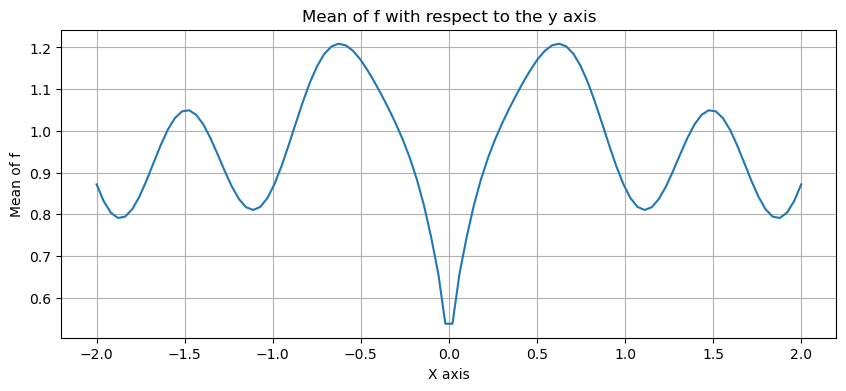

In [8]:
# Calculate the mean of f with respect to the y axis 
mean_f_y = np.mean(f, axis=0)

# Plot the mean as a function of x
plt.figure(figsize=(10, 4))
plt.plot(x, mean_f_y)
plt.title("Mean of f with respect to the y axis")
plt.xlabel("X axis")
plt.ylabel("Mean of f")
plt.grid(True)
plt.show()

### 1.8 Plot the mean of $f$ with respect to $\phi$ as a function of $r$

This is hard. You will need to define a discrete range of $r$ values and then figure out how to average $f$ within the bins defined by your $r$ grid. There are many different ways to accomplish this.

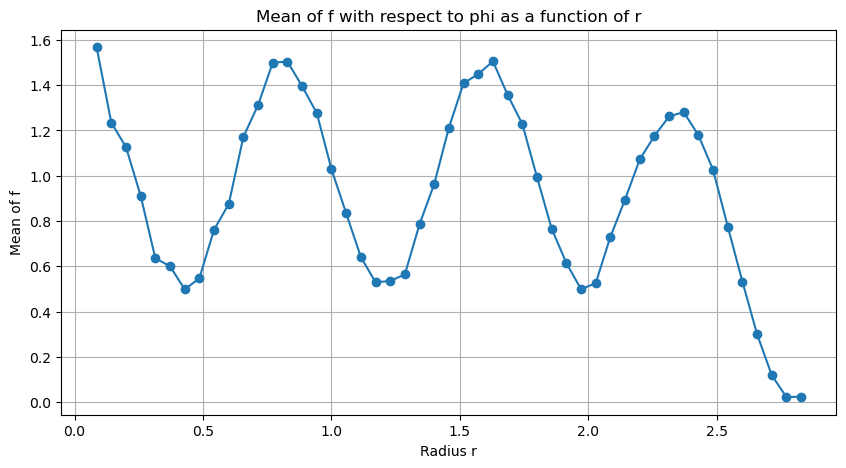

In [9]:
# Define a discrete range of r values (bins) for averaging
r_bins = np.linspace(np.min(r), np.max(r), num=50)
r_bin_indices = np.digitize(r, r_bins)

# Initialize an array to store the mean values of f for each r bin
mean_f_phi = np.zeros(len(r_bins))

# Calculate the mean of f for each r bin
for i in range(1, len(r_bins)):  
    indices = r_bin_indices == i
    if np.any(indices):
        mean_f_phi[i] = np.mean(f[indices])
    else:
        mean_f_phi[i] = np.nan  

# Remove the 0th element which corresponds to out-of-range values
r_bins = r_bins[1:]
mean_f_phi = mean_f_phi[1:]

# Plot the mean of f with respect to phi as a function of r
plt.figure(figsize=(10, 5))
plt.plot(r_bins, mean_f_phi, marker='o')
plt.title("Mean of f with respect to phi as a function of r")
plt.xlabel("Radius r")
plt.ylabel("Mean of f")
plt.grid(True)
plt.show()

## Part 2: Analyze [ARGO](http://www.argo.ucsd.edu) Data

In this problem, we use real data from ocean profiling floats.
ARGO floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. ARGO floats collect one "profile" (a set of messurements at different depths or "levels").

<img src="https://argo.ucsd.edu/wp-content/uploads/sites/361/2020/06/float_cycle_1.png" width="80%" />

Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let's start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise.
The following code will give you a list of `.npy` files that you can open in the next step.

In [10]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

['/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy']

### 2.1 Load each data file as a numpy array.

You can use whatever names you want for your arrays, but I recommend

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

**Note**: you have to actually look at the file name (the items in `files`) to know which files corresponds to which variable.


In [11]:
# Load each data file as a numpy array using the recommended names
T = np.load('/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy')
S = np.load('/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy')
P = np.load('/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy')
date = np.load('/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy')
lat = np.load('/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy')
lon = np.load('/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy')
level = np.load('/home/qy2307/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy')

### 2.2 Examine the shapes of T, S and P compared to `lon`, `lat`, `date` and `level`. How do you think they are related?

Based on the shapes, which dimensions do you think are shared among the arrays?

In [12]:
# Print the shapes of each array
print("Shape of T (Temperature):", T.shape)
print("Shape of S (Salinity):", S.shape)
print("Shape of P (Pressure):", P.shape)
print("Shape of lon (Longitude):", lon.shape)
print("Shape of lat (Latitude):", lat.shape)
print("Shape of date:", date.shape)
print("Shape of level (Depth Levels):", level.shape)

Shape of T (Temperature): (78, 75)
Shape of S (Salinity): (78, 75)
Shape of P (Pressure): (78, 75)
Shape of lon (Longitude): (75,)
Shape of lat (Latitude): (75,)
Shape of date: (75,)
Shape of level (Depth Levels): (78,)


The data of the three physical quantities T, S, and P have the same two-dimensional shape (78, 75), indicating that measurements were taken at 78 depth levels and at 75 different time points and locations. The first dimension (78) likely corresponds to depth levels (level), and the second dimension (75) corresponds to geographical locations and time points (represented by lon, lat, and date). 

### 2.3 Make a plot for each column of data in T, S and P (three plots). 

The vertical scale should be the `levels` data. Each plot should have a line for each column of data. It will look messy.

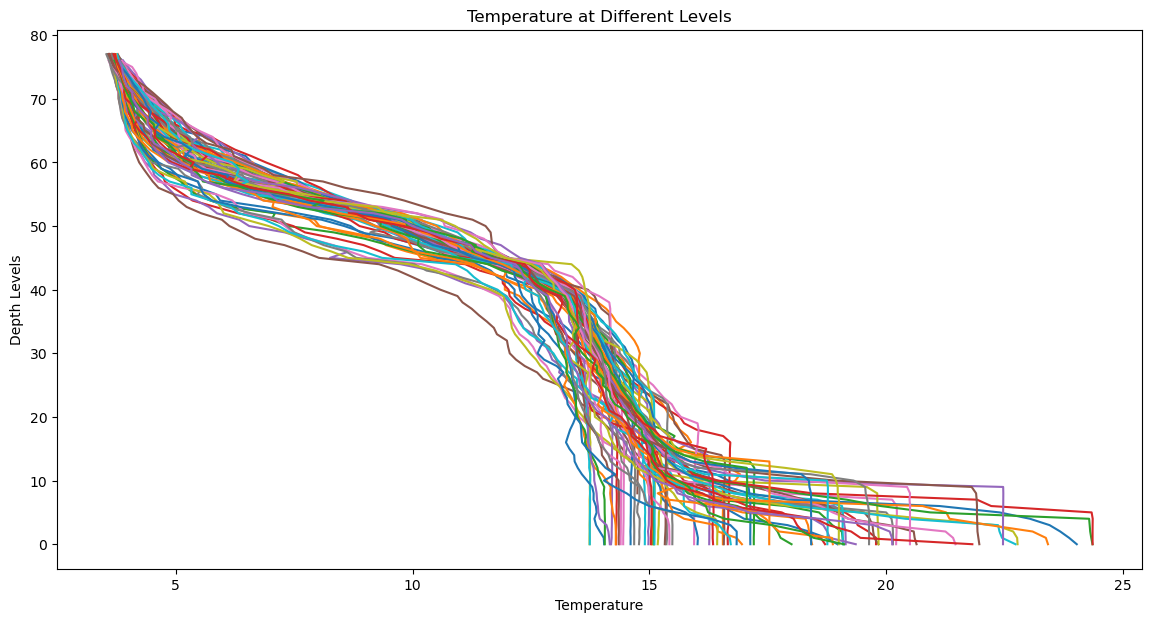

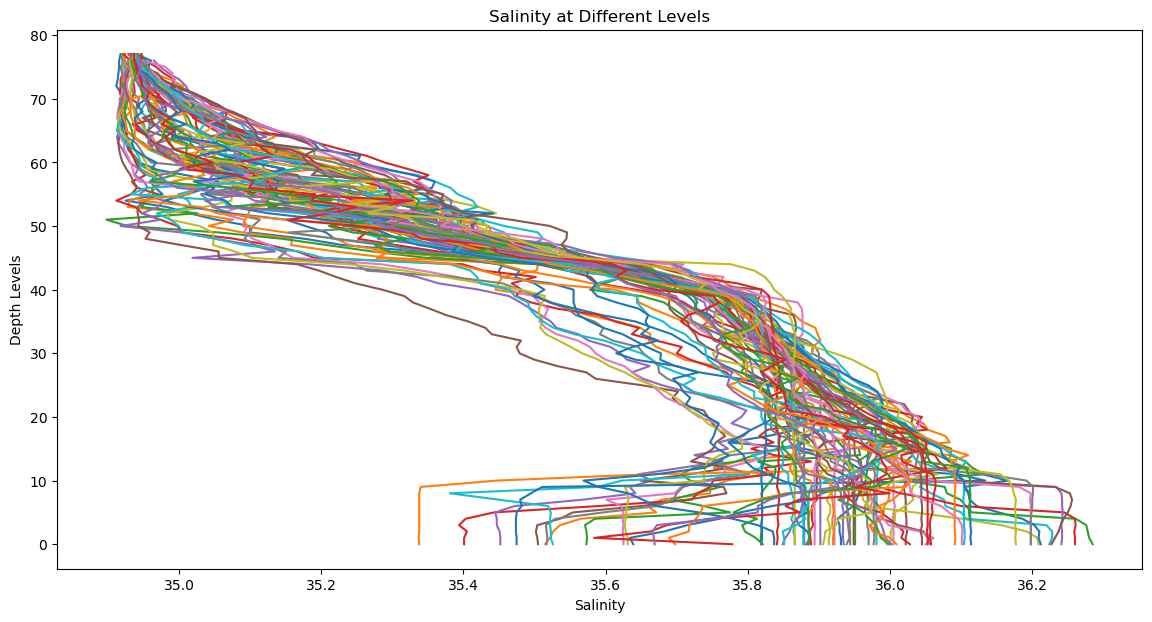

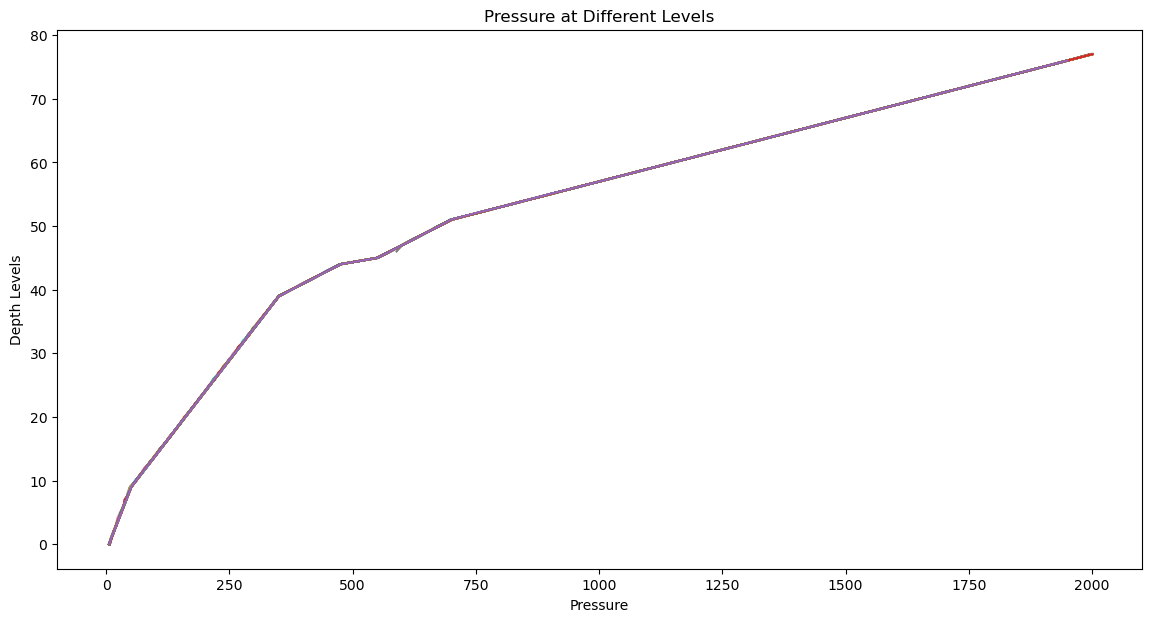

In [22]:
# Temperature
plt.figure(figsize=(14, 7))
for i in range(T.shape[1]):
    plt.plot(T[:, i], level)
plt.title('Temperature at Different Levels')
plt.xlabel('Temperature')
plt.ylabel('Depth Levels')
plt.show()

# Salinity
plt.figure(figsize=(14, 7))
for i in range(S.shape[1]):
    plt.plot(S[:, i], level)
plt.title('Salinity at Different Levels')
plt.xlabel('Salinity')
plt.ylabel('Depth Levels')
plt.show()

# Pressure
plt.figure(figsize=(14, 7))
for i in range(P.shape[1]):
    plt.plot(P[:, i], level)
plt.title('Pressure at Different Levels')
plt.xlabel('Pressure')
plt.ylabel('Depth Levels')
plt.show()


### 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [24]:
# Calculate the mean and standard deviation for Temperature
T_mean = np.mean(T, axis=1)
T_std = np.std(T, axis=1)

# Calculate the mean and standard deviation for Salinity
S_mean = np.mean(S, axis=1)
S_std = np.std(S, axis=1)

# Calculate the mean and standard deviation for Pressure
P_mean = np.mean(P, axis=1)
P_std = np.std(P, axis=1)


### 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show [error bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) on each plot using the standard deviations. 


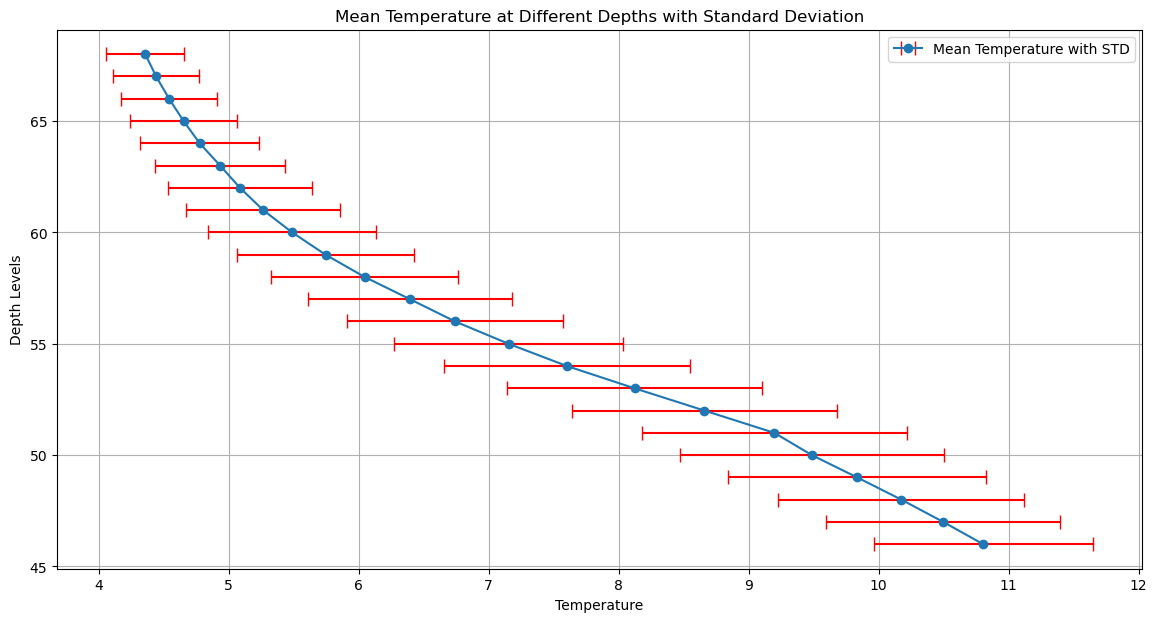

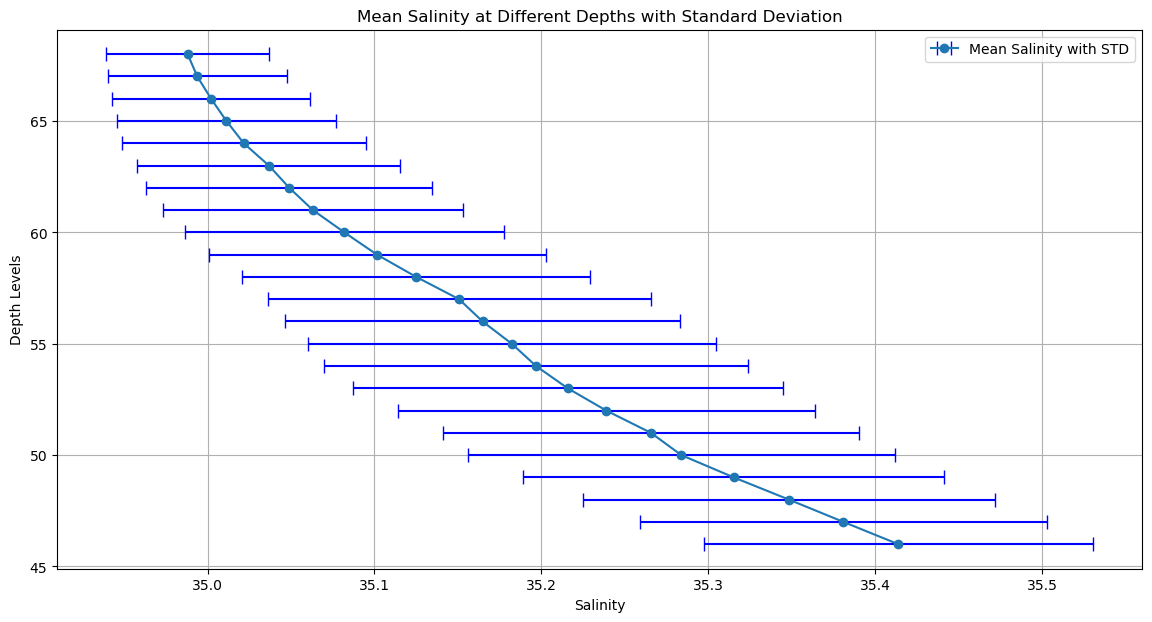

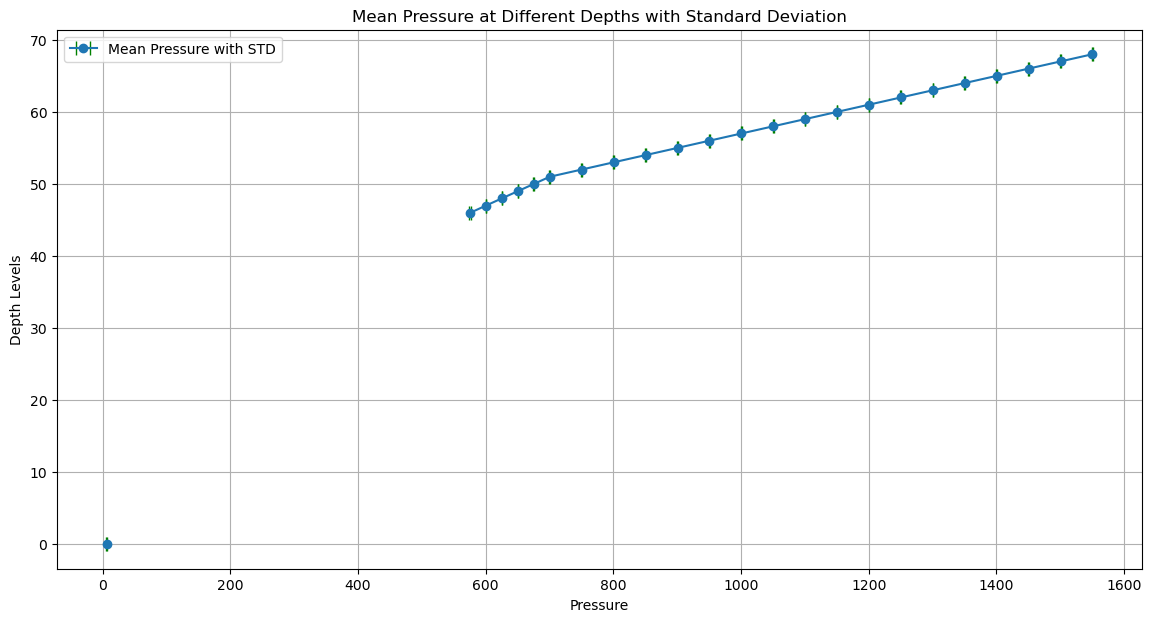

In [25]:
# Plot for Mean Temperature with Error Bars
plt.figure(figsize=(14, 7))
plt.errorbar(T_mean, level, xerr=T_std, fmt='-o', ecolor='red', capsize=5, label='Mean Temperature with STD')
plt.title('Mean Temperature at Different Depths with Standard Deviation')
plt.xlabel('Temperature')
plt.ylabel('Depth Levels')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Mean Salinity with Error Bars
plt.figure(figsize=(14, 7))
plt.errorbar(S_mean, level, xerr=S_std, fmt='-o', ecolor='blue', capsize=5, label='Mean Salinity with STD')
plt.title('Mean Salinity at Different Depths with Standard Deviation')
plt.xlabel('Salinity')
plt.ylabel('Depth Levels')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Mean Pressure with Error Bars
plt.figure(figsize=(14, 7))
plt.errorbar(P_mean, level, xerr=P_std, fmt='-o', ecolor='green', capsize=5, label='Mean Pressure with STD')
plt.title('Mean Pressure at Different Depths with Standard Deviation')
plt.xlabel('Pressure')
plt.ylabel('Depth Levels')
plt.legend()
plt.grid(True)
plt.show()


### 2.6 Account For Missing Data

The profiles contain many missing values. These are indicated by the special "Not a Number" value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes NaN. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

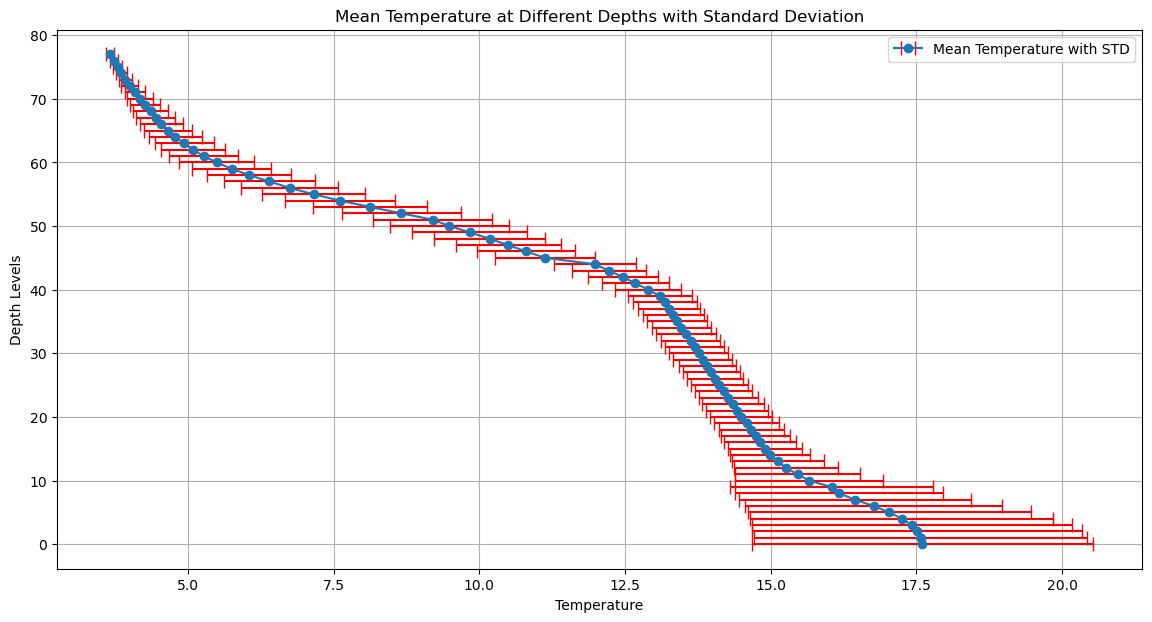

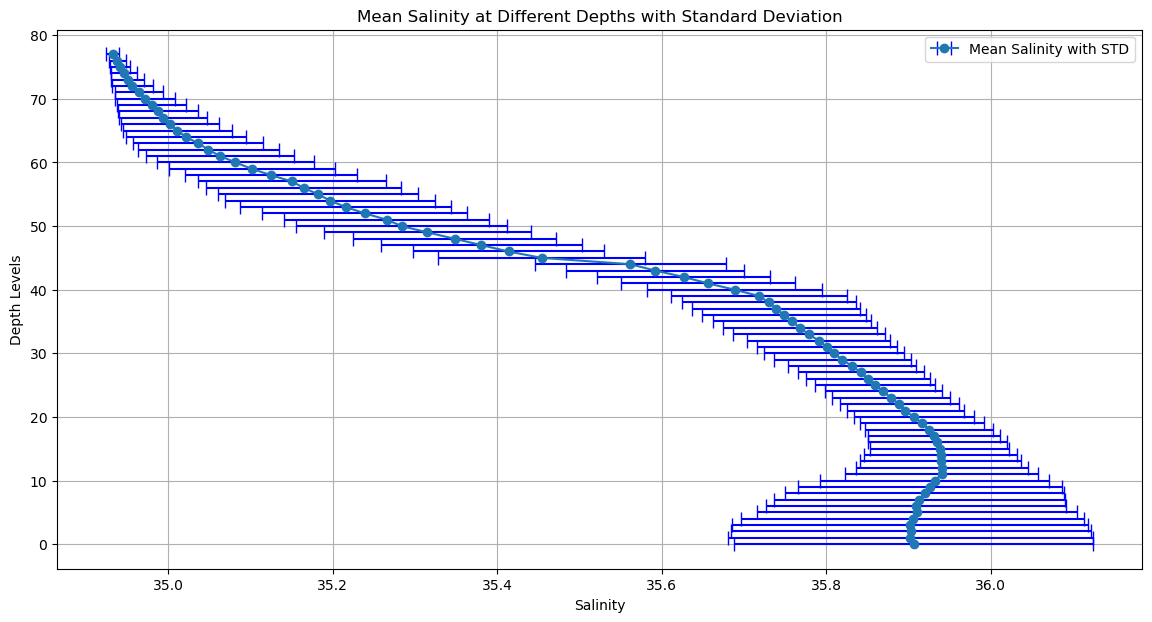

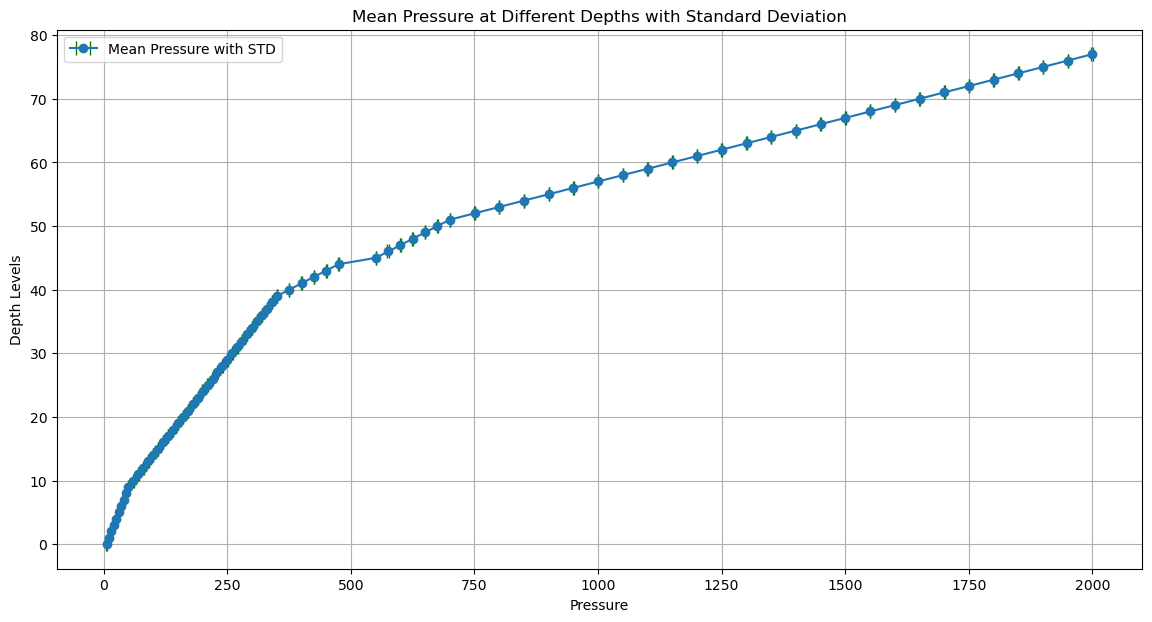

In [20]:
# Calculate the mean and standard deviation for Temperature, ignoring NaN values
T_mean = np.nanmean(T, axis=1)
T_std = np.nanstd(T, axis=1)

# Calculate the mean and standard deviation for Salinity, ignoring NaN values
S_mean = np.nanmean(S, axis=1)
S_std = np.nanstd(S, axis=1)

# Calculate the mean and standard deviation for Pressure, ignoring NaN values
P_mean = np.nanmean(P, axis=1)
P_std = np.nanstd(P, axis=1)

# Plot for Mean Temperature with Error Bars
plt.figure(figsize=(14, 7))
plt.errorbar(T_mean, level, xerr=T_std, fmt='-o', ecolor='red', capsize=5, label='Mean Temperature with STD')
plt.title('Mean Temperature at Different Depths with Standard Deviation')
plt.xlabel('Temperature')
plt.ylabel('Depth Levels')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Mean Salinity with Error Bars
plt.figure(figsize=(14, 7))
plt.errorbar(S_mean, level, xerr=S_std, fmt='-o', ecolor='blue', capsize=5, label='Mean Salinity with STD')
plt.title('Mean Salinity at Different Depths with Standard Deviation')
plt.xlabel('Salinity')
plt.ylabel('Depth Levels')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Mean Pressure with Error Bars
plt.figure(figsize=(14, 7))
plt.errorbar(P_mean, level, xerr=P_std, fmt='-o', ecolor='green', capsize=5, label='Mean Pressure with STD')
plt.title('Mean Pressure at Different Depths with Standard Deviation')
plt.xlabel('Pressure')
plt.ylabel('Depth Levels')
plt.legend()
plt.grid(True)
plt.show()

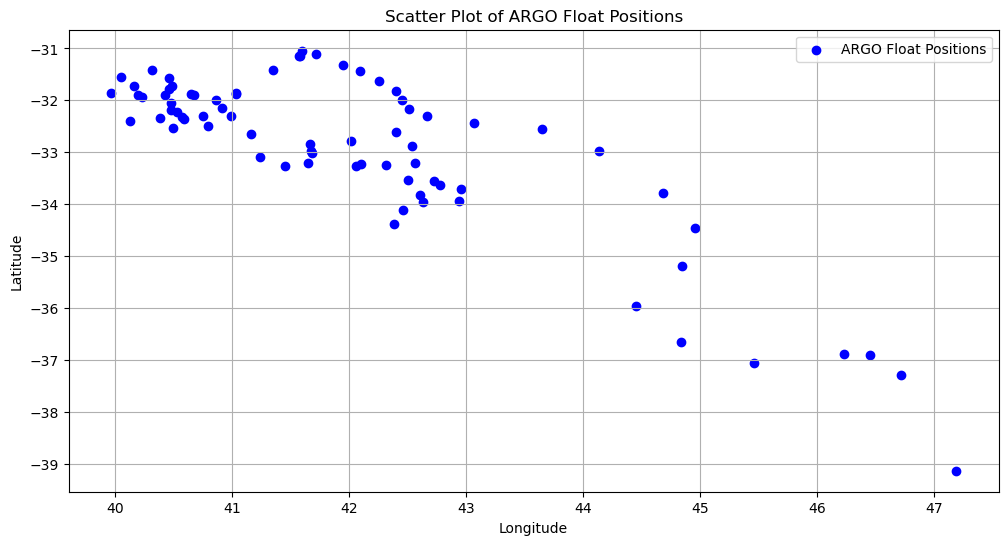

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(lat, lon, c='blue', marker='o', label='ARGO Float Positions')
plt.title('Scatter Plot of ARGO Float Positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()